In [95]:
import numpy as np
import pandas as pd

## 교통사고 데이터 서울만 정제

In [30]:
accident = pd.read_excel('data/cctv/교통사고.xls', skiprows=[1,2])

In [31]:
accident.head()

,시군구별 교통사고(기초),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,시도,시군구,사고건수,사망자수,부상자수,(중상자수),(경상자수)
1,합계,합계,209654,3081,306194,60564,226036
2,서울,합계,35227,219,47513,8797,34861
3,서울,종로구,903,5,1224,237,833
4,서울,중구,955,6,1248,300,814


In [32]:
accident = accident[accident['시군구별 교통사고(기초)']=='서울']

In [39]:
accident.columns = ['기초', '시군구', '사건건수', '사망자수', '부상자수', '중상자수', '경상자수']
accident.head()
accident.drop(columns='기초', inplace=True)

In [49]:
accident.drop(index=2, inplace=True)

In [50]:
accident.head()

,시군구,사건건수,사망자수,부상자수,중상자수,경상자수
3,종로구,903,5,1224,237,833
4,중구,955,6,1248,300,814
5,용산구,890,12,1178,246,900
6,성동구,1119,9,1481,322,1071
7,동대문구,1448,10,1845,432,1280


## cctv

In [72]:
cctv = pd.read_csv('data/cctv/서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv', encoding='euc-kr',skiprows=1)

In [73]:
cctv.구분[2] = '중구'
cctv.drop(index=0, inplace=True)

In [74]:
cctv = cctv[['구분', '총계']]
cctv.columns = ['시군구', 'cctv총계']

In [82]:
#cctv['cctv총계'] = cctv.cctv총계.str.replace(',','')
cctv['cctv총계'] = cctv['cctv총계'].apply(lambda x: int(x.replace(',',''))) # int 형은 lambda 사용하는게 편하다

In [84]:
cctv.head()

,시군구,cctv총계
1,종로구,1772
2,중구,2333
3,용산구,2383
4,성동구,3602
5,광진구,2588


In [91]:
df = pd.merge(cctv, accident, on='시군구')

## 분석

In [92]:
df.head()

,시군구,cctv총계,사건건수,사망자수,부상자수,중상자수,경상자수
0,종로구,1772,903,5,1224,237,833
1,중구,2333,955,6,1248,300,814
2,용산구,2383,890,12,1178,246,900
3,성동구,3602,1119,9,1481,322,1071
4,광진구,2588,869,4,1145,230,857


### 상관관계

In [93]:
df.set_index('시군구',inplace=True)

In [103]:
for column in df.columns[0:]:
    df[column] = df[column].apply(lambda x: int(x))

In [104]:
df

,cctv총계,사건건수,사망자수,부상자수,중상자수,경상자수
시군구,,,,,,
종로구,1772,903,5,1224,237,833
중구,2333,955,6,1248,300,814
용산구,2383,890,12,1178,246,900
성동구,3602,1119,9,1481,322,1071
광진구,2588,869,4,1145,230,857
동대문구,2497,1448,10,1845,432,1280
중랑구,3296,1447,4,1952,381,1345
성북구,3958,1275,7,1622,323,1195
강북구,2462,1087,3,1420,226,1124


In [109]:
np.corrcoef(df.cctv총계, df.사건건수)

array([[1.        , 0.67745034],
       [0.67745034, 1.        ]])

In [110]:
np.corrcoef(df.cctv총계, df.사망자수)

array([[1.        , 0.47045747],
       [0.47045747, 1.        ]])

In [111]:
np.corrcoef(df.cctv총계, df.부상자수)

array([[1.        , 0.67357289],
       [0.67357289, 1.        ]])

In [112]:
np.corrcoef(df.cctv총계, df.중상자수)

array([[1.        , 0.64981432],
       [0.64981432, 1.        ]])

In [113]:
np.corrcoef(df.cctv총계, df.경상자수)

array([[1.        , 0.68937569],
       [0.68937569, 1.        ]])

In [118]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

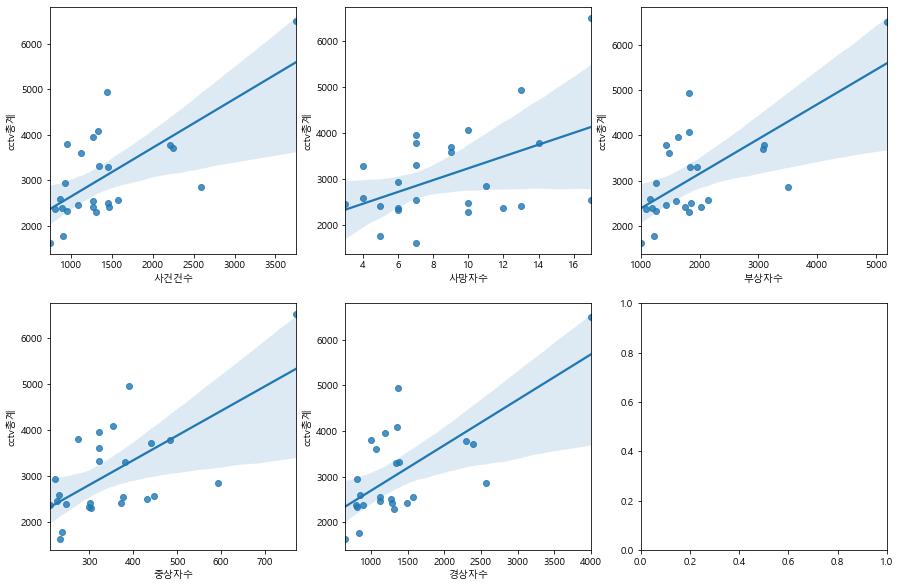

In [121]:
fig, axs = plt.subplots(figsize=(15,10), ncols=3, nrows=2)
features = ['사건건수', '사망자수', '부상자수', '중상자수', '경상자수']
for i, feature in enumerate(features):
    row, col = i//3, i%3
    sns.regplot(x=feature, y='cctv총계', data=df, ax=axs[row][col]) #산점도와 추세선을 합친거다

- 사고가 많이 나는곳 cctv 대수가 많다
- 년도별로 사고를 조사해서 증가량을 분석 나중에 해보자

<AxesSubplot:title={'center':'구별'}, ylabel='시군구'>

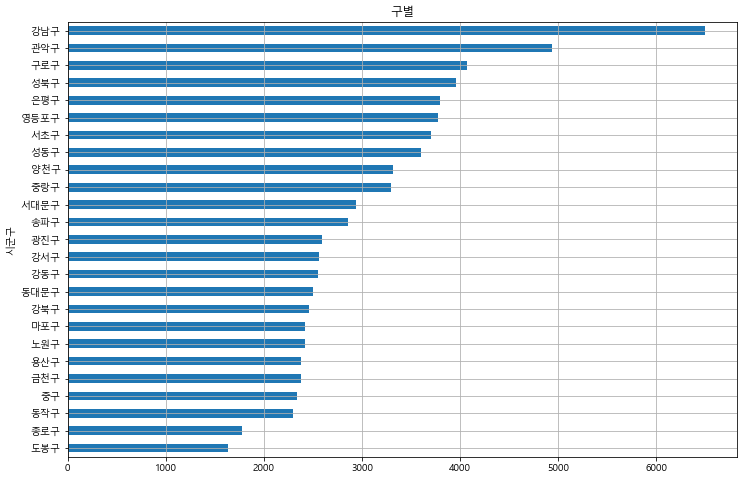

In [122]:
df.cctv총계.sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별cctv수')

<AxesSubplot:title={'center':'구별 cctv대비 사건수'}, ylabel='시군구'>

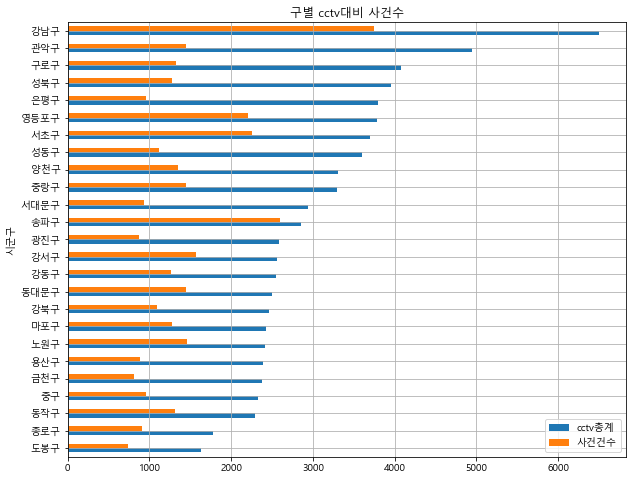

In [134]:
df.sort_values(by='cctv총계').plot.barh(y=['cctv총계', '사건건수'], figsize=(10,8), grid=True, title='구별 cctv대비 사건수')

<AxesSubplot:title={'center':'구별cctv수'}, ylabel='시군구'>

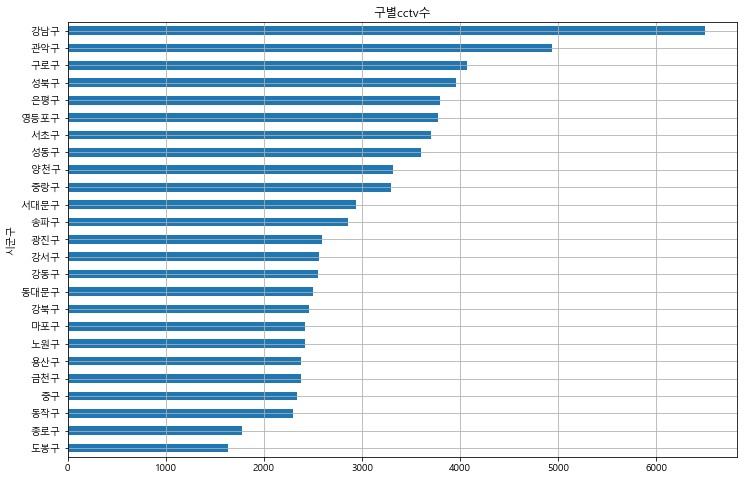

In [130]:
df.cctv총계.sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별cctv수')